In [1]:
import pandas as pd
import numpy as np

# Goal
- convert given Wallmart csv to the bottom csv
- set period according to the fiscal year of wallmart

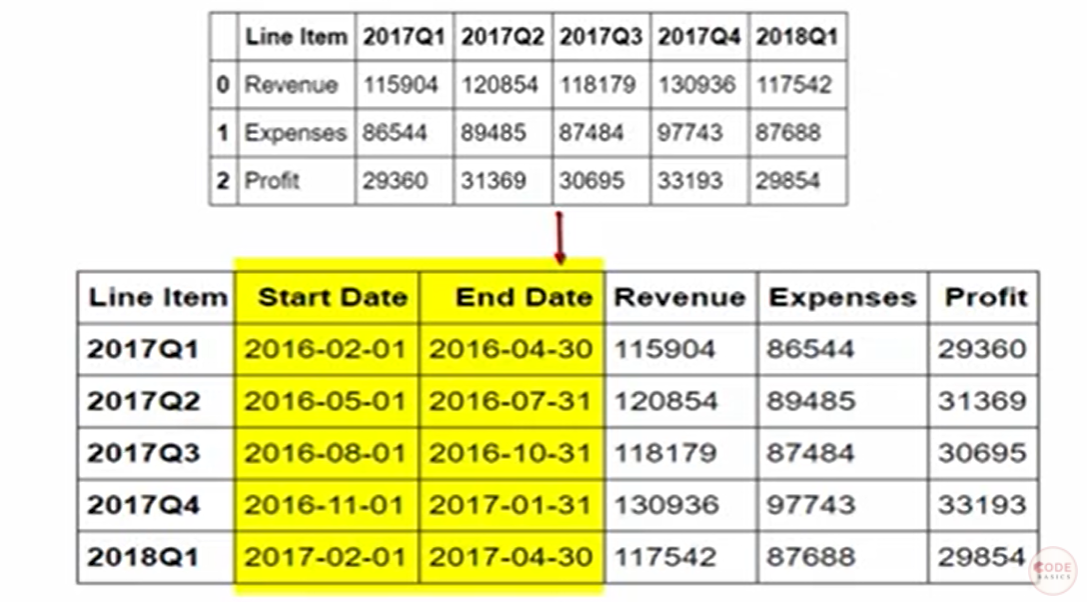

# Attempt

In [8]:
df = pd.read_csv('./Datasets/Csv/wallmart.csv')
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [9]:
# setting the 'Line Item' as the index

df2 = df.set_index('Line Item')
df2

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [13]:
# transposing the dataframe

# df3 = df2.transpose()
df3 = df2.T

df3

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [19]:
# index is object type, we need to convert it to period

df3.index

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [47]:
# converting index to fiscal quaterly period of wallmart (ends in january of every year)

period_index = pd.PeriodIndex(df3.index, freq='Q-JAN')
period_index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [35]:
period_index.start_time

DatetimeIndex(['2016-11-01', '2017-02-01', '2017-05-01', '2017-08-01',
               '2017-11-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [48]:
# creating the final dataframe

df4 = df3.copy()
df4.index = period_index # changing the index columns to period from object
df4['Start Date'] = period_index.start_time
df4['End Date'] = period_index.end_time

In [49]:
df4

Line Item,Revenue,Expenses,Profit,Start Date,End Date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999
